In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

In [49]:
def display_table(TableValues):
    out = widgets.Output()
    with out:
        display(TableValues)
    return out

In [50]:
def LinearInterpolationFcn(actualValue, lowerBound, upperBound, lowerValue, upperValue):
    Result = lowerValue + (upperBound-actualValue)*(upperValue-lowerValue)/(upperBound-lowerBound)
    return Result

### Traffic Input Data

In [ ]:
V = 2800
PHF = 0.94
P_T = 0.10

### Roadway Input Data

In [52]:
N = 2
Terrain = "Level"
LaneWidth = 11
LateralClear = 3.5
TRD = 2

### Calculate Analysis Flow Rate

$$v_{p} = \frac{V}{{PHF} \times N \times f_{HV}}\tag{HCM Eq. 12-9}$$

Where:  
*v<sub>p</sub>* = 15-min passenger car equivalent flow rate in pc/h/ln,  
*V* =	hourly volume in veh/h,  
*PHF* = peak-hour factor,  
*N*	=	number of lanes, and  
*f<sub>HV</sub>* = heavy-vehicle adjustment factor.

##### Get Passenger Car Equivalent Value
Only general terrain categories currently included

HCM Exhibit 12-25 Passenger Car Equivalents for General Terrain Segments

| Terrain | *E<sub>T</sub>* |
| :-: | :-: |
| Level | 2.0 | 
| Rolling | 3.0 |

In [53]:
if Terrain == "Level":
    E_T = 2.0
else:
    E_T = 3.0

print(E_T)


2.0


#### Calculate Heavy Vehicle Factor
$$f_{HV} = \frac{1}{1 + P_{T}\left( E_{T} - 1 \right)} \tag{HCM Eq. 12-10}$$

$f_{HV}$ = heavy-vehicle adjustment factor,  
$P_{T}$ = proportion of heavy vehicles in the traffic stream, and  
$E_{T}$ = passenger car equivalent for heavy vehicles, from Table 6.5, 6.6, 6.7, or 6.8 (Exhibits 12-25 – 12-28 HCM).

In [54]:
f_HV = 1 / (1 + P_T*(E_T - 1))
print (f_HV)

0.9090909090909091


In [55]:
v_p = V / (PHF * N * f_HV)
print (v_p)

1872.340425531915


### Calculate Traffic Stream Average Speed

#### Estimate Free-Flow Speed

$$FFS = 75.4 - f_{LW} - f_{RLC} - 3.22\left({TRD} \right)^{0.84}\tag{HCM Eq. 12-2}$$

Where:  
*FFS* = free-flow speed (mi/h)  
75.4 = base free-flow speed (mi/h)  
$f_{LW}$ = adjustment for lane width from Table 6.3 (Exhibit 12-20) (mi/h)  
$f_{RLC}$ = adjustment for right-shoulder lateral clearance from Table 6.4 (Exhibit 12-21) (mi/h)  
*TRD* = total ramp density (ramps/mi)  

In [56]:
f_LW_table = pd.DataFrame({
    'Lane Width (ft)': [12, 11, 10],
    'Reduction in free-flow speed, f_LW (mi/h)': [0.0, 1.9, 6.6]
})

display(display_table(f_LW_table))

Output()

### Lateral Clearance Adj. Factor
HCM Exhibit 12-21
Reduction in free-flow speed, $f_{RLC}$ (mi/h), for the number of lanes in one direction (2-5+)

| Right-shoulder lateral clearance (ft) | &nbsp;&nbsp; 2 &nbsp;&nbsp;	|	&nbsp;&nbsp; 3 &nbsp;&nbsp;	|	&nbsp;&nbsp; 4 &nbsp;&nbsp;	|	&nbsp;&nbsp; $\geq$ 5 &nbsp;&nbsp; | 
| :-: | :---: | :---: | :---: | :---: |
| $\geq$ 6 |	0.0	|	0.0	|	0.0	|	0.0 | 
| 5	|	0.6	|	0.4	|	0.2	|	0.1 | 
| 4	|	1.2	|	0.8	|	0.4	|	0.2 | 
| 3	|	1.8	|	1.2	|	0.6	|	0.3 | 
| 2	|	2.4	|	1.6	|	0.8	|	0.4 | 
| 1	|	3.0	|	2.0	|	1.0	|	0.5 | 
| 0	|	3.6	|	2.4	|	1.2	|	0.6 | 

In [57]:
f_RLC_table = pd.DataFrame({
    'Right-shoulder lateral clearance (ft)': [6, 5, 4, 3, 2, 1, 0],
    '2 lanes': [0.0, 0.6, 1.2, 1.8, 2.4, 3.0, 3.6],
    '3 lanes': [0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4],
    '4 lanes': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2],
    '5 lanes': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
})

display(display_table(f_RLC_table))

Output()

#### Get f_RLC value

In [58]:
if LateralClear >= 6:
      f_RLC = 0
elif (LateralClear >= 5):
      f_RLC = LinearInterpolationFcn(LateralClear, f_RLC_table.iloc[1,0], f_RLC_table.iloc[0,0], f_RLC_table.iloc[0,N-1], f_RLC_table.iloc[1,N-1])
elif (LateralClear >= 4):
      f_RLC = LinearInterpolationFcn(LateralClear, f_RLC_table.iloc[2,0], f_RLC_table.iloc[1,0], f_RLC_table.iloc[1,N-1], f_RLC_table.iloc[2,N-1])
elif (LateralClear >= 3):
      f_RLC = LinearInterpolationFcn(LateralClear, f_RLC_table.iloc[3,0], f_RLC_table.iloc[2,0], f_RLC_table.iloc[2,N-1], f_RLC_table.iloc[3,N-1])
elif (LateralClear >= 2):
      f_RLC = LinearInterpolationFcn(LateralClear, f_RLC_table.iloc[4,0], f_RLC_table.iloc[3,0], f_RLC_table.iloc[3,N-1], f_RLC_table.iloc[4,N-1])
elif (LateralClear >= 1):
      f_RLC = LinearInterpolationFcn(LateralClear, f_RLC_table.iloc[5,0], f_RLC_table.iloc[4,0], f_RLC_table.iloc[4,N-1], f_RLC_table.iloc[5,N-1])
elif (LateralClear >= 0):
      f_RLC = LinearInterpolationFcn(LateralClear, f_RLC_table.iloc[6,0], f_RLC_table.iloc[5,0], f_RLC_table.iloc[5,N-1], f_RLC_table.iloc[6,N-1])

print(f_RLC)
    

1.5


#### Get f_LW value

In [59]:
if LaneWidth >= 12:
    f_LW = 0
elif LaneWidth >= 11:
    f_LW = 1.9
elif LaneWidth >= 10:
    6.6
else: -99  #Cannot use a lane width less than 10 ft

print(f_LW)

1.9


In [60]:
FFS = float(75.4 - f_LW - f_RLC - 3.22*(TRD)**0.84)
print(FFS)

66.23603854322386


$$S=\left\{\begin{array}{l l}
FFS_{adj} & {\text {if }v_p \leq {BP}} \\
FFS_{adj} - \frac{\left({FFS}_{adj} - \frac{c_{adj}}{D_{c}} \right)\left(v_{p} - {BP} \right)^{2.0}}{\left(c_{adj} - BP \right)^{2.0}} & {\text {if } BP < v_p \leq c}
\end{array}\right. \tag{HCM Eq. 12-1}$$

$$c = \text{Min}\left\lbrack 2200 + 10\left({FF}S_{adj} - 50 \right),2400 \right\rbrack {~~~~~ 55 \leq {FFS} \leq 75} \tag {HCM Exhibit 12-6}$$

$$BP = \left\lbrack 1000 + 40\left( 75 - {FFS}_{adj} \right) \right\rbrack \times {CAF}^{2} {~~~~~ 55 \leq {FFS} \leq 75} \tag{HCM Exhibit 12-6}$$

Where:  
> $c$ = capacity in pc/h/ln,  
> $v_p$	= 15-min passenger car equivalent flow rate in pc/h/ln,  
> $BP$ = linear to curvilinear flow rate breakpoint value in pc/h/ln, and  
> $D_c$	= density at capacity (45 pc/mi/ln).

In [61]:
EquationData = pd.DataFrame({'Volume':0,'Speed':0}, index=[0], dtype='float')

Dc = 45
BP = 1000+40*(75-FFS)
Cap = min(2200 + 10*(FFS-50), 2400)
TrafficVol = np.arange(0, Cap, 25)
print(BP)
print(Cap)

1350.5584582710458
2362.3603854322387


In [62]:
Counter = 0
for Vol in TrafficVol:
    if Vol < BP:
        AvgSpeed = FFS
    else:
        AvgSpeed = FFS - (((FFS - (Cap/Dc))*(Vol-BP)**2)/(Cap-BP)**2)
        
    NewDataRow = pd.Series({'Volume':Vol,'Speed':AvgSpeed})
    #pd.concat([EquationData, NewDataRow.to_frame().T])
    EquationData.loc[Counter] = NewDataRow
    Counter=Counter+1

C:\Users\swash\AppData\Local\Temp\ipykernel_12484\691871196.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.23603854322386' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  EquationData.loc[Counter] = NewDataRow


### Plot Speed-Flow Curve

<function matplotlib.pyplot.show(close=None, block=None)>

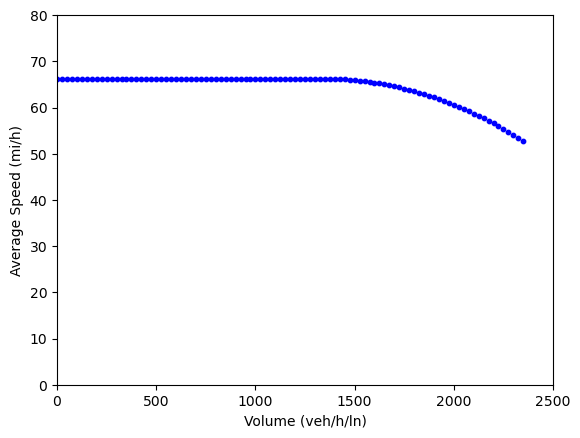

In [63]:
plt.scatter(EquationData['Volume'],EquationData['Speed'], c="blue", s=8^2)
plt.xlim(0, 2500)
plt.ylim(0, 80)
plt.xlabel('Flow Rate (veh/h/ln)')
plt.ylabel('Average Speed (mi/h)')
plt.show

### Calculate Density

$$D = \frac{v_{p}}{S}\tag{HCM Eq. 12-11}$$

Where:  
*D*	=	density in pc/mi/ln,  
$v_{p}$ =	flow rate in pc/h/ln, and  
*S*	=	average passenger car speed in mi/h.

In [64]:
S = AvgSpeed
D = v_p/S
print(D)

35.44050214617883


### Determine LOS

HCM Exhibit 12-15

**Level of Service**|**Density (pc/mi/ln)**
:-----:|:-----
A |$\leq$ 11
B |> 11-18
C |> 18-26
D |> 26-35
E |> 35-45
F |> 45 or Demand exceeds capacity

In [65]:
if D <= 11:
    LOS = "A"
elif D <= 18:
    LOS = "B"
elif D <= 26:
    LOS = "C"
elif D <= 35:
    LOS = "D"
elif D <= 45:
    LOS = "E"
else: LOS = "F"

print(LOS)

E
